In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo
from nengo.utils.matplotlib import rasterplot
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")
plt.rcParams['figure.figsize'] = (9.0, 5.0)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
def prettify():
    sns.despine()
    plt.tight_layout()

/usr/local/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


# How to build a brain<br>with Python

### Trevor Bekolay

Our brains are amazing computing devices.
They weigh about 2 kilograms,
are composed of around 86 billion neurons
and on the order of a quadrillion connections between neurons,
and consume about 20 watts of power.
Yet they're responsible for creating
language, art, computer science,
and Python, which is why we're here today.
I'm a theoretical neuroscientist,
which means that I build computer
simulations of brains.
Today, I want to tell you how we use Python
to create and run those simulations.

<img src="img/feynman.png" class="center" width="70%">

$\quad\quad\quad\quad$
<img src="img/astroboy.svg" class="inline" width="35%">
$\quad$
<img src="img/hal.svg" class="inline" width="15%">
$\quad$
<img src="img/skynet.svg" class="inline" width="15%">

It's worth first talking about why we want to
build simulations of the brain.
The first reason is to understand it.
Shortly before his passing,
Richard Feynman wrote:
"What I cannot create, I do not understand."
We think that the best way to understand
how the brain works is to try to
do what the brain does,
under the same types of constraints that
the brain works under.

The second reason to model the brain is
to build better artificial intelligences.
There are both optimistic and pessimistic
examples of AIs in science fiction.
I think that what makes the pessimistic
examples like Hal and Skynet seem plausible
is that these intelligences are not brain-like;
they're foreign, mysterious, almost magical types
of intelligence that we can't reason with or about.
I hope to convince you today that this type of
superintelligence is not realistic;
we have to engineer intelligence,
it won't emerge magically.
If we do manage to create something
as sophisticated as these scifi examples,
we'll know precisely how it works,
and how to reason with it.

# Neural simulators

0. Emulate neurobiology.
0. Operate in continuous time.
0. Communicate with spikes.

<img src="img/convnet.jpg" class="center" width="75%">
<img src="img/no.png" class="fragment center" width="35%" style="position:relative;top:-320px;">

Programs that simulate neural systems
like the brain are called neural simulators.
There are three important characteristics
shared by all of neural simulators
I'm going to talk about today.
One, they attempt to emulate neurobiology
at some level of abstraction.
As a consequence of emulating neurobiology,
they operate in continuous time,
and they communicate with spikes.

I'll explain what this means
shortly, but first I want to
contrast neural simulators to the
artificial neural networks
you may have heard about.
Artificial neural networks, including
the multilayered Deep Learning networks
that Facebook and Google
are using now for image and speech recognition,
are very sophisticated statistical tools,
but they make no attempt to emulate neurobiology;
in particular,
they operate in discrete rather than continuous time;
and they do not use spikes to communicate.

For these reasons, I don't consider
artificial neural network models neural simulators.

http://www.ais.uni-bonn.de/deep_learning/

<img src="img/neuron.png" class="center">

In [85]:
!neurondemo

NEURON -- VERSION 7.3 ansi (1078:2b0c984183df) 2014-04-04
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2014
See http://www.neuron.yale.edu/neuron/credits

loading membrane mechanisms from /usr/local/Cellar/neuron/7.3/share/nrn/demo/release/x86_64/.libs/libnrnmech.so
Additional mechanisms from files
 cabpump.mod cachan1.mod camchan.mod capump.mod invlfire.mod khhchan.mod mcna.mod nacaex.mod nachan.mod release.mod
oc>

I'll start appropriately with
one of the first neural simulators every created,
which is still actively developed and used today,
called NEURON. It is a C program with
a GUI and Python bindings.
NEURON was how I was introduced to a lot of
the elements of neuroscience,
since it does a very good job emulating
real biological neurons.
Let's start with the demo that comes with NEURON.

You can see right off the bat
that I did not lie;
thi is an old program, with an old GUI.
Let's start with the Pyramidal demo
to get introduced to neurobiology.
Here we can see some of the parts of a neuron.
These branching processes are called dendrites.
You can think of dendrites as
the inputs to the cell,
and there can be many inputs for one cell.
The dendrites all converge onto
the body of the cell, which is called the soma.
Every cell has a single output process
called an axon, which can also branch out.
So, you can think of a neuron essentialy as
a function that takes in many inputs
through its dendrites
and produces a single output,
through its axon.

Right now,
NEURON is doing a "current clamp" experiment,
so you can see the "IClamp" here,
"I" stands for current.
This is mimicking an actual neuroscientific experiment.
There is a simulated electrode, here in the soma
at the blue dot,
and it's injecting a pulse of current
into the cell.
If we run this experiment,
we can see the voltage
of the cell plotted over time.
So, the y-axis here is membrane voltage,
and the x-axis here is time.
In almost all of our plots, in fact,
the x-axis will be time,
because neural simulators
operate in continuous time,
so rule number 2.
When the voltage of a cell
goes quickly up and down like this,
we call it a spike,
and it's how neurons communicate,
rule number 3.
This spike will travel down the axon
and pass on some information to downstream neurons.

We can move where we're injecting current,
so let's inject current at a dendrite,
let's say here,
and when we run it again,
we no longer get a spike,
and so this cell does not communicate
with its downstream neuron.

There are a ton of other parameters
we can play around with here
to learn more about neurons.
But we'd like this to be reproducible,
so let's do it in Python.

In [3]:
import neuron

soma = neuron.h.Section()
soma.L = 40  # Length in um
soma.diam = 20  # Diameter in um
soma.insert('hh')

dendrite = neuron.h.Section()
dendrite.L = 150
dendrite.diam = 3
dendrite.insert('pas')

dendrite.connect(soma, 0, 1);

In [4]:
stim = neuron.h.IClamp(soma(0.5))
stim.delay = 0
stim.amp = 1  # Amplitude in nA
stim.dur = 500

rec_t = neuron.h.Vector()
rec_t.record(neuron.h._ref_t)

rec_v = neuron.h.Vector()
rec_v.record(soma(0.5)._ref_v);

I'll do a much simplified model here,
just a soma and a single dendrite.
We create them by makng Section objects,
and setting their parameters accrodingly.
So my soma has a length of 40 micrometers,
and a diameter of 20 micrometers.
This line inserts a set of ion channels.
My dendrite has a length of 150 micrometers,
a diameter of 3 micrometers,
and a different set of ion channels.
Then we connect them together.

Next, we set up our current clamp experiment,
injecting 1 nanoamp of current for 500 milliseconds,
directly into the soma.
We then set up what NEURON calls vectors
to record the time (ref_t)
and the voltage (ref_v)
at the soma.

In [5]:
neuron.h.finitialize(-60)
neuron.init()
neuron.run(500)

In [6]:
times = np.array(rec_t)
voltages = np.array(rec_v)

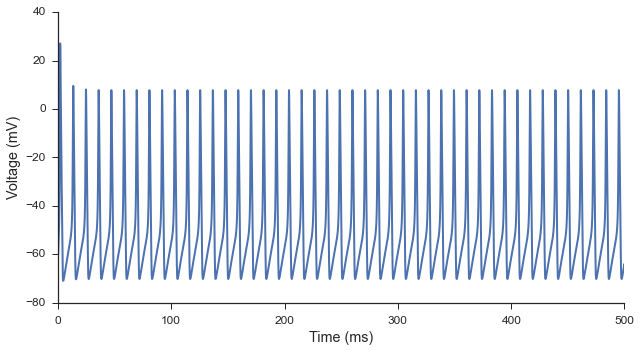

In [7]:
plt.plot(times, voltages)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.xlim(right=500)
prettify()

We set the initial voltage,
initialize,
and run the simulation for 500 milliseconds.

At this point, we can take the data from NEURON
and put them in NumPy arrays.

And then we can plot those arrays with Matplotlib.
This neuron is now quite active,
spiking a lot in these 500 milliseconds.
You can spend a lot of time playing around
with all of the parameters
in this simulation
to see how each one
affects the neural activity.

But how does NEURON actually work?
Well, the way NEURON makes these simulations
is through some built-in equations
that define how the neuron
responds to injected current.
These equations are based on the physics
of electrical circuits.
There are more and less detailed ways
to model those physics.
If we wanted to switch to a less detailed,
but faster, neuron model,
it is possible specify that in NEURON,
but unfortunately,
it can't be done through Python bindings.

<pre><code>
TITLE Anomalous rectifier
UNITS {
        (mA) = (milliamp)
        (mV) = (millivolt)
} 
NEURON {
        SUFFIX Khcvode
  	  USEION k WRITE ik
        RANGE  gkbar, gk, ik
} 
INDEPENDENT {t FROM 0 TO 1 WITH 1 (ms)}
PARAMETER {
        v (mV)
        celsius = 37 (degC)
        mon = 1
	  man = 1
	  nan = 1
        gkbar = .0003 (mho/cm2)
        ekcvode	= -30 (mV)
}
DERIVATIVE state {  :Computes rate and other constants at current v.
                    :Call once from HOC to initialize inf at resting v.
        q10 = 3^((celsius - 37)/10)        	
                :"m" potassium activation system
        minf = 1/(1+exp((v+78)/7))
	  mtau= 38/q10
        ntau = 319/q10
        m += mon * ((man * 0.8 * (minf-m)/mtau) + (nan * 0.2 * (minf-m)/ntau))
}
</code></pre>

You have to write in NEURON's domain specific language.
Not awful,
but since you have to compile these
files before rerunning your model,
it slows down your workflow,
and it's difficult to keep
both syntaxes in working memory.
It would be nice if everything was in Python.

<img src="img/brian.png" class="center">

Which brings me to Brian,
which is a neural simulator
implemented entirely in Python.
In contrast to NEURON,
Brian puts the equations behind each neuron
front and center.

In [9]:
import brian2 as br

# Parameters
C = 281 * br.pF
gL = 30 * br.nS
taum = C / gL
reset_v = -70.6 * br.mV
VT = -50.4 * br.mV
DeltaT = 2 * br.mV
Vcut = VT + 5 * DeltaT
tauw = 144*br.ms
a = 4*br.nS
b = 0.0805*br.nA
Vr = -70.6*br.mV

eqs = """
dvm/dt = (gL*(reset_v - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I - w)/C : volt
dw/dt = (a*(vm - reset_v) - w)/tauw : amp
I : amp
"""

Here's some code to make a somewhat less detailed
neuron model than the example we saw in NEURON.
The code is admittedly harder to read
than the NEURON code,
but it's more flexible as the
equations are in the same script as the parameters,
and you don't need a two-step process to run your model.
Brian also explicitly tracks units,
which is important for validation.
You can see, for example,
that the reset voltage is in millivolts.

In [14]:
neuron = br.NeuronGroup(
    1, model=eqs, threshold='vm>Vcut', reset="vm=Vr; w+=b")
neuron.vm = reset_v
neuron.I = 1.5*br.nA

In [11]:
voltage = br.StateMonitor(neuron, 'vm', record=0)
spikes = br.SpikeMonitor(neuron)
br.run(500 * br.ms)

In [12]:
vm = voltage[0].vm[:]
for t in spikes.t:
    i = int(t / br.defaultclock.dt)
    vm[i] = 20*br.mV

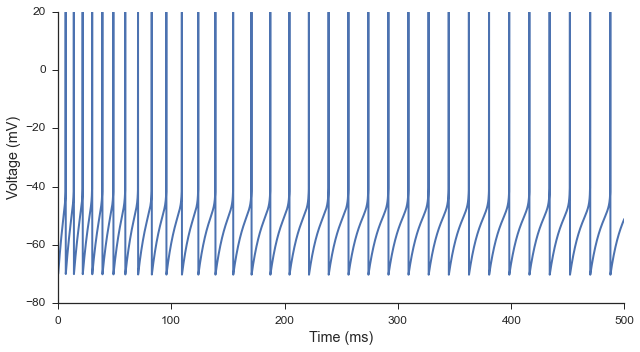

In [13]:
plt.plot(voltage.t / br.ms, vm / br.mV)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
prettify()

So, we can create what Brian calls a neuron group
with a single neuron in it,
then set its initial voltage,
and input current.

We monitor the voltage and the times at which the cell spikes,
and run the simulation for 500 milliseconds.

Here's what the voltage trace looks like when we plot it.
Quite similar to the NEURON example.

- [NEST (NEural Simulation Tool)](http://www.nest-initiative.org/index.php/PyNEST)
- [MOOSE (Multiscale Object-Oriented Simulation Environment)](http://journal.frontiersin.org/article/10.3389/neuro.11.006.2008/abstract)
- [GENESIS (GEneral NEural SImulation System)](http://genesis-sim.org/userdocs/tutorial-python-scripting/tutorial-python-scripting.html)
- [NEVESIM (Neural EVEnt-based SIMulator)](http://journal.frontiersin.org/article/10.3389/fninf.2014.00070/abstract)
- [PCSIM (Parallel neural Circuit SIMulator)](http://www.lsm.tugraz.at/pcsim/)
- [Brainlab](http://journal.frontiersin.org/article/10.3389/neuro.11.016.2009/abstract)
- [Topographica](http://journal.frontiersin.org/article/10.3389/neuro.11.008.2009/abstract)
- [PyNN](http://neuralensemble.org/PyNN/)
- ...

NEURON and Brian aren't the only neural simulators
that work in Python; here are 8 more projects
that simulate biologically realistic neurons.
They all have their strength and weaknesses.
But to me they're not very satisfying.
This talk is about how to build *brain*,
but these tools are focused on building *neurons*.
We have 86 billion neurons, but a quadrillion
connections between them;
the brain is really about how neurons are connected.

## Scaling from neurons to brains

<div class="fragment" style="display:inline-block;width:32%;">
  <img src="img/dice.png" class="center" width="60%">
  <h3>Option 1: random</h3>
</div>

<div class="fragment" style="display:inline-block;width:32%;">
  <img src="img/connectome.jpg" class="center" width="90%">
  <h3>Option 2: statistics</h3>
</div>

<div class="fragment" style="display:inline-block;width:34%;">
  <img src="img/function.jpg" class="center" width="100%">
  <h3>Option 3: function</h3>
</div>

So, let me do a quick poll of the audience.
How do you think we can scale these neurons up to brains?
We know that we have to simulate 86 billion neurons,
but how can we connect them together
to make human-scale intelligences?

Option 1:
We connect them up completely randomly.
Maybe the neurons are actually what matter;
if we have enough of them, it doesn't matter how
we connect them, we'll get intelligence.

Option 2:
We can't just sample randomly;
the brain is connected in a particular pattern,
so let's collect the statistics
of how the brain is connected,
replicate that, and we'll get intelligence.

Option 3:
Connect them in a carefully sculpted way
to do specific information processing tasks.
We know certain brain regions are responsible
for certain functions, so let's go one at a time,
and figure out how to connect neurons together to
process visual information, perform skilled movements, etc.

Okay, so now, a show of hands.
Hands up for option 1, connect them randomly.
Hands up for option 2, connect them according to statistics.
Hands up for option 3, connect them to perform functions.

It seems like most of you agree
that function is important.
Unfortunately, it's very time-consuming
and difficult to connect neurons together
to perform functions manually.
If we want to go this route --
and I would argue that we do --
we need tools that can connect neurons together
in functionally relevant ways.

<img src="img/nengo.png" class="inline" width="48%">
$\quad$
<img src="img/nef.png" class="inline" width="48%">

Nengo aims to be that tool.
Nengo is a neural simulator that focuses on
connecting groups of neurons together
using a theoretical framework called
the Neural Engineering Framework,
or NEF for short.
Like other neural simulators,
we are still emulating neurobiology,
we are still operating in continuous time,
and we're still communicating with spikes.
But our focus is on scaling up neural simulators
to the scale of brains.

<img src="img/raster.svg" class="center" width="80%">

So far, we've been looking
at the activity of a single neuron.
This plot is called a spike raster,
and it shows up the activity of many neurons.
Each vertical tick is a spike,
so each row contains the spikes for one neuron,
of course, over time.
If you look at this raster in particular,
there's clearly some sort of pattern.
How can we make sense of this?
How exactly do hundreds, or thousands of neuron
cooperate to represent and process information?

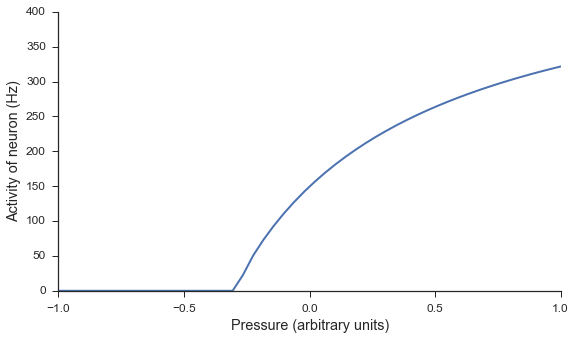

In [92]:
with nengo.Network(seed=10) as net:
    ens = nengo.Ensemble(15, dimensions=1)
sim = nengo.Simulator(net)

activities, rates = nengo.utils.ensemble.tuning_curves(ens, sim)
plt.plot(activities[:, 0], rates[:, 0])
plt.ylabel("Activity of neuron (Hz)")
plt.xlabel("Pressure (arbitrary units)")
plt.ylim(top=400)
sns.despine()
plt.savefig('img/neuralcode-1.svg')

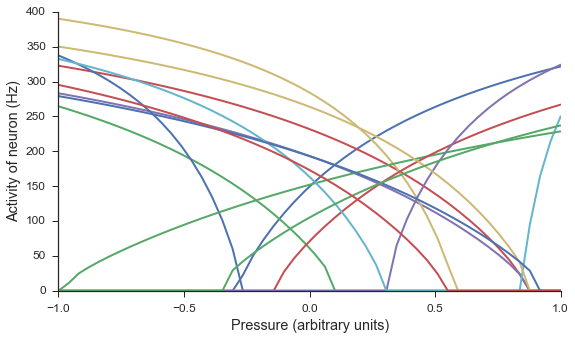

In [93]:
plt.plot(activities, rates)
plt.ylabel("Activity of neuron (Hz)")
plt.xlabel("Pressure (arbitrary units)")
sns.despine()
plt.savefig('img/neuralcode.svg')

<img src="img/neuralcode-1.svg" class="center" width="80%">

Well, fortunately, neurons don't respond
in entirely arbitrary ways.
Everything that you think and experience
has some neural correlate.
Let's use as an example touch.
There are nerve endings in your skin
that are sensitive to pressure.
A neuron downstream of these nerve endings
aggregates this information to
determine how much pressure is
being exerted on a particular part of your skin.
If you record from these neurons,
you might get a result like this:
as you exert more pressure,
the firing rate of the cell increases.

Unfortunately, this is an idealized
version of reality;
neurons are actually very noisy,
so in order to reliably estimate
quantities like pressure,
we aggeregate the responses
of several cells that are sensitive
to the same quantity.
So how do we combine the information
conveyed by many neurons?

## Neural code $\approx$ binary code

<div class="fragment fade-out" data-fragment-index="1">

\begin{align*}
  x &= 13 \\
  a &= \mathtt{\LARGE{1 1 0 1}}\\
  d &= 2^3 \, 2^2 \, 2^1 \, 2^0 \\
  \hat{x} &= 1 \times 2^3 + 1 \times 2^2 + 0 \times 2^1 + 1 \times 2^0 \\
  &= 8 + 4 + 1 = 13
\end{align*}

</div>

<div class="fragment fade-in" data-fragment-index="1" style="position:relative; top:-240px;">

\begin{align*}
  x &= 0.5 \\
  a &= 23 \text{Hz}, 60 \text{Hz}, 3 \text{Hz}, \text{...} \\
  d &= d_0, d_1, d_2, ... \\
  \hat{x} &= 23 \times d_0 + 60 \times d_1 + 3 \times d_2 + \text{...} \\
  &\approx 0.5
\end{align*}

</div>

It turns out that we do it in a way
very similar to binary code.

Computers represent information with
binary numbers.
Let's say we want to represent the number 13.
We can encode this as the binary number 1101.
We know that each bit corresponds
to a power of two.
We can decode this back to decimal
by essentially weighting each of these digits
with the power of two they encode.

In the NEF,
we consider the neural code to be very similar.
Let's say that we want to encode the value 0.5;
so, there's some medium positive pressure
on your finger.
In the neural case,
rather than each bit being true or false,
each neuron is firing at a particular rate.
If we could figure out some weights,
we'll call them d for "decoder",
then we could decoding the encoded value
like in the binary case;
by weighting the neural activity by certain weights
to get an estimate of the originally encoded value.

In [57]:
x = np.arange(8)
bit2 = np.array((x % 8) >= 4, dtype=float)
bit1 = np.array((x % 4) >= 2, dtype=float)
bit0 = np.array((x % 2) >= 1, dtype=float)

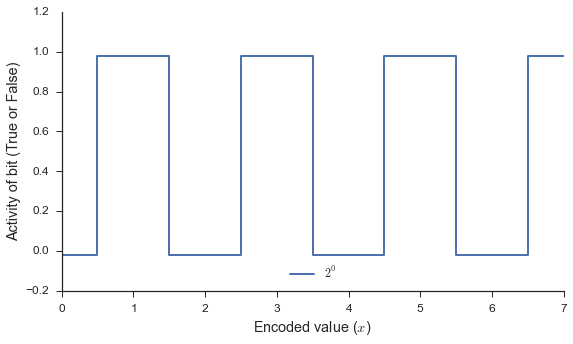

In [69]:
plt.plot(x, bit0 - 0.02, drawstyle="steps-mid", label="$2^0$")
plt.ylabel('Activity of bit (True or False)')
plt.xlabel('Encoded value ($x$)')
plt.ylim(top=1.2)
plt.legend(loc='lower center', fontsize='large', ncol=3)
sns.despine()
plt.savefig('img/binarycode-1.svg')

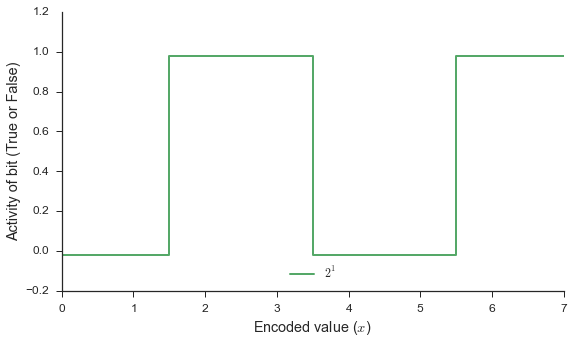

In [70]:
plt.plot(0,0)
plt.plot(x, bit1 - 0.02, drawstyle="steps-mid", label="$2^1$")
plt.ylabel('Activity of bit (True or False)')
plt.xlabel('Encoded value ($x$)')
plt.ylim(top=1.2)
plt.legend(loc='lower center', fontsize='large', ncol=3)
sns.despine()
plt.savefig('img/binarycode-2.svg')

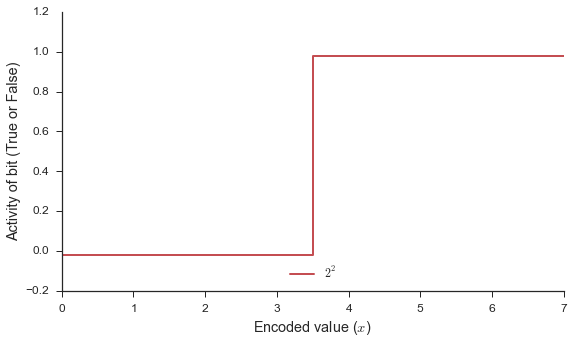

In [71]:
plt.plot(0,0)
plt.plot(0,0)
plt.plot(x, bit2 - 0.02, drawstyle="steps-mid", label="$2^2$")
plt.ylabel('Activity of bit (True or False)')
plt.xlabel('Encoded value ($x$)')
plt.ylim(top=1.2)
plt.legend(loc='lower center', fontsize='large', ncol=3)
sns.despine()
plt.savefig('img/binarycode-3.svg')

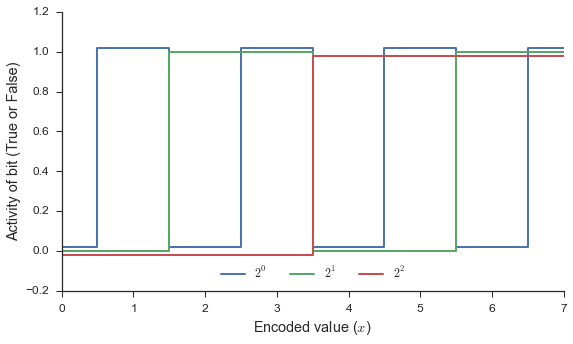

In [72]:
plt.plot(x, bit0 + 0.02, drawstyle="steps-mid", label="$2^0$")
plt.plot(x, bit1, drawstyle="steps-mid", label="$2^1$")
plt.plot(x, bit2 - 0.02, drawstyle="steps-mid", label="$2^2$")
plt.ylabel('Activity of bit (True or False)')
plt.xlabel('Encoded value ($x$)')
plt.legend(loc='lower center', fontsize='large', ncol=3)
sns.despine()
plt.savefig('img/binarycode.svg')

## Neural code $\approx$ binary code

<img src="img/binarycode-1.svg" class="center" width="80%">
<img src="img/binarycode-2.svg" class="center fragment" width="80%" style="position:relative;top:-428px;">
<img src="img/binarycode-3.svg" class="center fragment" width="80%" style="position:relative;top:-855px;">
<img src="img/binarycode.svg" class="center fragment" width="80%" style="position:relative;top:-1283px;">
<img src="img/neuralcode-1.svg" class="center fragment" width="80%" style="position:relative;top:-1711px;">
<img src="img/neuralcode.svg" class="center fragment" width="80%" style="position:relative;top:-2138px;">

That's difficult to grasp in words,
so let's try to visualize it.
First, the binary case.
Let's think about what each bit is doing,
for the first 8 integers.
On the x-axis, we have the integer we're encoding.
On the y-axis, we have the state of that bit.
Our lowest order bit, $2^0$, alternates
true and false.
$2^1$ switches every two encoded numbers.
$2^2$ is 0 for the first four integeres,
then switches to 1.
Individually, each bit only tells us some
information about the encoded value.
But together, we can exactly determine
the encoded value by looking at
the state of our bits.
So, here at the end, all 3 bits are true,
so that's 1 + 2 + 4 = 7.

Now, similarly in the neural case,
one neuron's activity
tells us only a little bit about
how much pressure on our finger.
If it seems to be firing at 200 Hz,
then perhaps we're in the 0.2 pressure range.
Unfortunately, because neurons are so noisy,
we can't be confident of that estimate;
and if it's not spiking at all,
it could be anywhere in this range.
So, we look at the reponses of
a bunch of neurons.
If only these neurons are highly active,
for example,
then we can be quite confident that we're
in a negative pressure situation.
Using an optimization technique,
we can determine a set of weights
such that the weighted sum of the neural activity
gives us a 

Essentially, this gives us a way to encode and decode
information using spiking neurons.
This is the basis for how Nengo
lets us scale up neural simulations
from a few neurons to
something brain-like.

## Nengo is a *neural compiler*

<div class="fragment fade-out" data-fragment-index="1">

<code><pre>
int x = 3;
int y = x * x;
printf("%d squared is %d", x, y);
</pre></code>

$$\quad$$
    
$$\Downarrow$$

$$\quad$$

<code><pre>
...
	subq	$16, %rsp
	leaq	L_.str(%rip), %rdi
	movl	$3, -4(%rbp)
	movl	-4(%rbp), %eax
	imull	-4(%rbp), %eax
	movl	%eax, -8(%rbp)
	movl	-4(%rbp), %esi
	movl	-8(%rbp), %edx
	movb	$0, %al
	callq	_printf
	movl	$0, %edx
	movl	%eax, -12(%rbp)
...
</pre></code>

</div>

<div class="fragment fade-in" data-fragment-index="1" style="position:relative; top:-480px;">

<code><pre>
val = Node(output=0.5)
x = Ensemble(n_neurons=40, dimensions=1)
squared = Ensemble(n_neurons=40, dimensions=1)
Connection(val, x)
Connection(x, squared, function=lambda x: x * x)
</pre></code>
    
$$\quad$$
    
$$\Downarrow$$

$$\quad$$

<code><pre>
Ensemble 'x'
------------
neuron_type=LIF()
gain=[   11.25053668   202.13530672     7.22401682    33.2550193     35.97808839
     8.09500913    18.48783009     4.52011101    31.35391507    22.79914949
    99.57712634     9.9972526     10.4300937     26.44722378    16.64511324
     8.56703477   204.64658142    20.72961175    12.59879579     4.14133187
    67.31407332    23.71409087     6.91468826    29.96178344    66.86728154
    11.62997747    65.68513384    26.42944824   515.40393534     9.28512135
     5.40755927    54.51278395    30.00517318  2038.11571883    12.07297056
     6.00363065    20.58459027    10.03664157    11.29825745    35.45346505]
bias=[  9.44466013e-01  -1.90908878e+02   7.95278618e+00  -1.54254303e+00
  -6.26779005e+00   8.23853682e+00  -2.61010180e+00   4.50550452e+00
   8.47744978e+00   6.02264271e+00  -7.36539327e+01  -1.48795118e+00
   2.60012838e+00  -1.00077690e+00  -4.52833925e+00  -7.33437033e-02
  -1.73268693e+02  -9.16093383e+00   1.29271729e+01   4.29083492e+00
  -5.35103933e+01  -5.36784048e+00   4.45757505e+00  -8.74177689e+00
  -4.05562843e+01  -2.98500272e+00  -3.48752843e+01  -1.68317917e+01
  -4.96956302e+02   1.02301275e+01   3.04630174e+00  -2.09019904e+01
  -8.92324954e+00  -2.01891216e+03   4.63307652e+00   6.01789071e+00
   8.42017799e+00   5.07842705e+00   8.50458248e+00  -1.77831709e+01]


Ensemble 'squared'
------------
neuron_type=LIF()
gain=[ 166.98348239   13.55000393   11.10501859   53.70178142   24.2046276
   10.55205272   26.97733589   10.69131454  156.05276375   20.9357595
    5.43800614   68.57201592   72.65123458   33.9680321    24.57512569
   21.1976429     8.67434404   14.53680377    8.09275949   22.9356037
   16.37519448   22.30781058   45.03301059   33.3462742    51.18795506
    8.69509189   18.11261709   14.81518274   17.63978738   35.22776264
    7.22343981   13.65154979    9.23444351   23.98063544   49.24764976
   59.66650699   41.04237034   24.87989631  238.85308633    7.96430909]
bias=[-130.53655762    7.9815554     7.90733762  -46.13916876   -7.32546692
    8.29221574   -4.50890614   10.42385029 -130.8065894     2.41053476
    2.37360306  -54.36523527  -46.73389939  -22.48866651   -5.65097727
   12.08397309    9.58977002   -4.21937901   -0.69890639   -2.60386428
   14.00605036   -8.02315356  -17.02830542    2.50456163  -32.80185813
   -1.03692479   -0.87231805   10.27828142    8.38370787   -8.55839931
    4.0243432    -4.39155615    9.07749725  -10.17955921  -40.19829161
  -20.341822    -10.16668571    6.74012336 -226.96010992    6.54200717]


Connection 'x->squared'
-----------------------
decoders=[[  1.60794810e-04   1.28863058e-04  -1.58415261e-05   2.33935353e-04
    2.27420025e-04  -1.99271624e-05   2.04197749e-04   2.64319388e-05
    1.48746335e-04   6.63795669e-05   2.90423062e-04   1.49912439e-04
    1.19707234e-04   1.92758931e-04   1.70101357e-04   1.47749115e-04
    4.91023627e-04   4.16415977e-04  -5.59905588e-05  -8.46265664e-05
    2.47756109e-04   2.65295259e-04   5.60745015e-05   2.08307183e-04
    2.63151063e-04   1.43506596e-04   2.64467801e-04   1.86141162e-04
    1.37304126e-04  -1.54465394e-04   7.12132301e-05   2.35052901e-04
    3.17766505e-04   4.28723382e-05   6.92211091e-05  -1.28598294e-04
    3.09857283e-05   1.16231202e-04  -4.20618385e-05   5.46221120e-04]]
solver_info={'rmses': array([ 0.022518])}
</pre></code>
</div>

A useful analogy is to think of Nengo as a neural compiler.

In computing, compilers allow us to write
programs in an understandable high-level language,
to be later compiled into machine code,
which is specific to your hardware.
Think about what the state of computing would be now
if we still had to program by typing in machine code.

Similarly, Nengo allows us to define
models in terms of what information is represented,
and how it's transformed.
Nodes are representations that are not neural,
so they're analogous to the current
we injected in our earlier simulations.
Ensembles are populations of neurons
that collectively represent information.
Connecting them together transmits
the high-level representations from
nodes to ensembles, or from ensembles to ensembles,
possibly with a transformation,
as is done in the connection from 'x' to 'squared'.

Under the hood, Nengo is determining
how to inject current into the ensemble
to represent the value in the node --
so that's the gain and bias here,
as well as a set of decoders that
implements the function
that we specified across the neural connection.

Nengo gives us a high level of abstraction
for neural models, just
like compilers do for computer programs.
This allows us to build models
by specifying what information
should be represented, and how
that information should be transformed.

In [153]:
import nengo

with nengo.Network(seed=14) as net:
    val = nengo.Node(output=0.5)
    x = nengo.Ensemble(40, dimensions=1)
    squared = nengo.Ensemble(40, dimensions=1)
    nengo.Connection(val, x)
    nengo.Connection(x, squared, function=lambda x: x * x)
    
    v_pr = nengo.Probe(x.neurons[0], 'voltage')
    sp_pr = nengo.Probe(x.neurons, 'spikes')
    x_probe = nengo.Probe(x, synapse=0.03)
    sq_probe = nengo.Probe(squared, synapse=0.03)

In [154]:
sim = nengo.Simulator(net)
sim.run(1.0)

Simulation finished in 0:00:01.                                                 


In [ ]:
print("Ensemble 'x'")
print("------------")
print("neuron_type=%r" % x.neuron_type)
print("gain=%s" % sim.data[x].gain)
print("bias=%s" % sim.data[x].bias)
print("\n")
print("Ensemble 'squared'")
print("------------")
print("neuron_type=%r" % squared.neuron_type)
print("gain=%s" % sim.data[squared].gain)
print("bias=%s" % sim.data[squared].bias)
print("\n")
print("Connection 'x->squared'")
print("-----------------------")
print("decoders=%s" % sim.data[net.connections[-1]].decoders)
print("solver_info=%s" % sim.data[net.connections[-1]].solver_info)

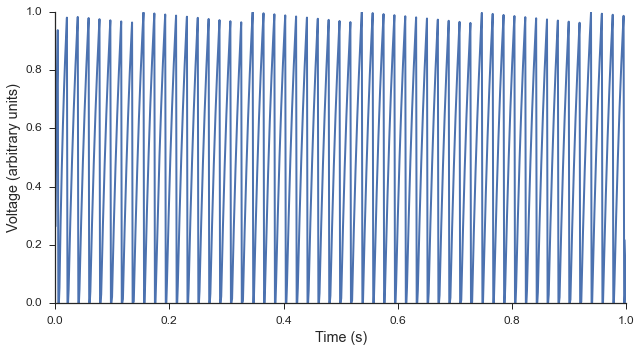

In [155]:
plt.plot(sim.trange(), sim.data[v_pr])
plt.ylabel("Voltage (arbitrary units)")
plt.xlabel("Time (s)")
prettify()

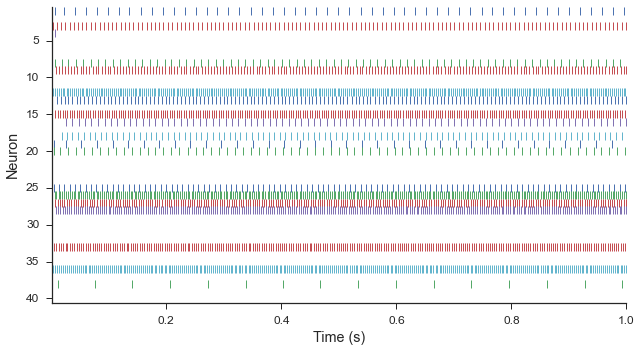

In [156]:
rasterplot(sim.trange(), sim.data[sp_pr])
plt.ylabel("Neuron")
plt.xlabel("Time (s)")
prettify()

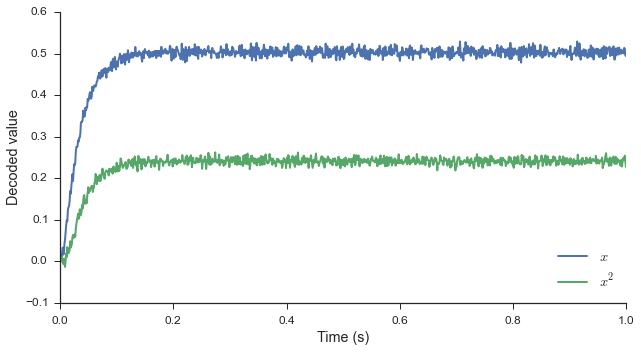

In [157]:
plt.plot(sim.trange(), sim.data[x_probe], label="$x$")
plt.plot(sim.trange(), sim.data[sq_probe], label="$x^2$")
plt.ylabel("Decoded value")
plt.xlabel("Time (s)")
plt.legend(loc="best", fontsize="x-large")
prettify()

In [160]:
val.output = lambda t: np.sin(t * 2 * np.pi)
sim = nengo.Simulator(net)
sim.run(1.0)

Simulation finished in 0:00:01.                                                 


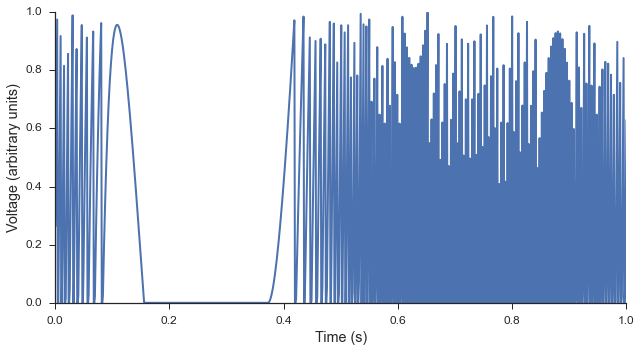

In [161]:
plt.plot(sim.trange(), sim.data[v_pr])
plt.ylabel("Voltage (arbitrary units)")
plt.xlabel("Time (s)")
prettify()

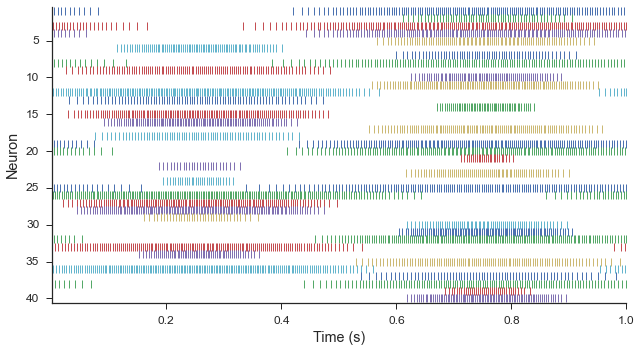

In [162]:
rasterplot(sim.trange(), sim.data[sp_pr])
plt.ylabel("Neuron")
plt.xlabel("Time (s)")
prettify()

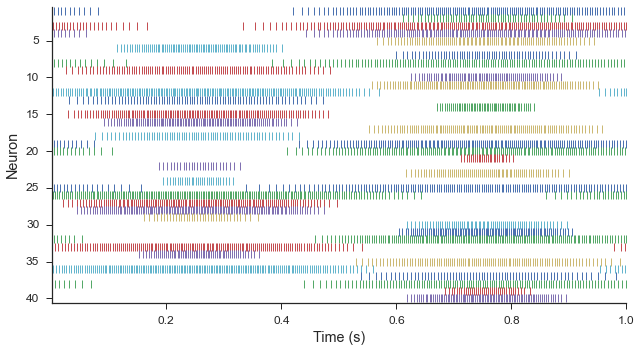

In [163]:
rasterplot(sim.trange(), sim.data[sp_pr])
plt.ylabel("Neuron")
plt.xlabel("Time (s)")
prettify()
plt.savefig('img/raster.svg')

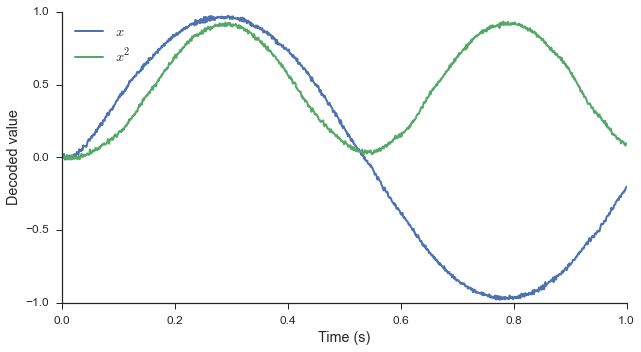

In [165]:
plt.plot(sim.trange(), sim.data[x_probe], label="$x$")
plt.plot(sim.trange(), sim.data[sq_probe], label="$x^2$")
plt.ylabel("Decoded value")
plt.xlabel("Time (s)")
plt.legend(loc="best", fontsize="x-large")
prettify()

Let's actually run this network.
The code is as you saw it before;
the Network object is just a way
too keep things organized.
So we create the node and both ensembles
in this network,
connect them together,
and then add probes to collect
certain types of data.

To run the simulation, we create a simulator object,
and run it.

We can then plot what we've probed.
Here is the voltage from one cell
in the 'x' ensemble.
Looks similar to the neurons
from NEURON and Brian.

Here's the spike raster of all of the cells
in the 'x' ensemble.
They respond quite consistently over time,
as we're just representing a constant value.

Nengo's encoding and decoding scheme allows us to
take this spiking activity and decode out the higher-level
representations in the two ensembles.
As you can see, the 'x' population is indeed representing
0.5, while the 'x squared' population represents
something close to 0.25, which is 0.5 squared.

One big difference between this type of computing
and traditional computing
is that it's dynamic;
it's operating in continuous time.
For that reason, these networks work better
with dynamic value.
So let's change the 'val' node from representing
a number, to representing a sine wave.

The voltage trace changes,
but only because we're changing how much current
we're injecting into the cell.

Similarly, our spike raster changes
as some cells only spike during the
positive or negative portion of the sine wave.

But with their aggregate activity,
we're representing a sine wave
in the 'x' population,
and representing the square in the
'squared' population.

<video preload="auto">
  <source src="img/spaun.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

There's a lot more to Nengo and the NEF,
but those two analogies --
that it's a neural compiler
that represents information
analogously to binary coding --
are really the fundamentals.
These two ideas, plus a few more ideas,
plus a decade or so of research,
has led to models of working memory,
motor control, vision,
all respecting the constraints of biology
but actually working.
We put all of these models together
into a huge model called Spaun,
which looks at images of digits,
and performs 8 cognitive tasks by
driving a simulated arm to 
write digits as a response.

In [ ]:
bg = nengo.networks.BasalGanglia(dimensions=4)

In [ ]:
import nengo_ocl
ocl_sim = nengo_ocl.Simulator(network)

import nengo_spinnaker
spinnaker_sim = nengo_spinnaker.Simulator(network)

- http://nengo.ca/build-a-brain/spaunvideos
- http://github.com/nengo/
- <a href="http://www.amazon.com/How-Build-Brain-Architecture-Architectures/dp/0199794545/">
    <img src="img/htbab.jpg" class="inline" width="150">
  </a>

I don't have time to go into any details
on Spaun, but I wanted to highlight
two more ways in which Nengo
allows us to scale up to larger,
more complex models.
An integral part of Spaun
is called the Basal Ganglia,
which is a set of brain areas
that selects one action
out of a set of possible actions.
Designing the basal ganglia
took several weeks of research,
but now it's possible for
anyone to include it in their neural
models with this single line of code.
This creates all of the ensembles
and connections to do action selection.

Another way we're scaling up is running models
on different platforms.
Instead of `nengo.Simulator`,
you can use `nengo_ocl.Simulator` to run
your model on GPUs using OpenCL.
Or you can use `nengo_spinnaker.Simulator`
to run your model on the SpiNNaker
neuromorphic chips.

To learn more about Spaun,
check out the videos at nengo.ca.
To learn more about Nengo,
you can out our Github organization.
And to learn more about the
theory behind it all,
check out Chris Eliasmith's book,
How to Build a Brain.

In [168]:
%%writefile oscillator.py
import nengo
import nengo_viz
import numpy as np

tau, r = 0.01, 4

def feedback(x):    
    return [-tau*r*x[1]+1.01*x[0], tau*r*x[0]+1.01*x[1]]
def osc_shape(x):
    theta = np.arctan2(x[1], x[0])
    r = (2 - 2 * np.sin(theta)
         + np.sin(theta)*np.sqrt(np.abs(np.cos(theta)))
         / (np.sin(theta)+1.4))
    return -r*np.cos(theta), r*np.sin(theta)

with nengo.Network('Oscillator', seed=1) as model:
    stim = nengo.Node(0)
    oscillator = nengo.Ensemble(1000, dimensions=2)
    shape = nengo.Ensemble(100, dimensions=2, radius=4)
    nengo.Connection(stim, oscillator[0])
    nengo.Connection(stim, oscillator[1])
    nengo.Connection(oscillator, oscillator,
                     function=feedback, synapse=tau)
    nengo.Connection(oscillator, shape,
                     function=osc_shape, synapse=tau)

if __name__ == '__main__':
    nengo_viz.Viz(__file__).start()

Overwriting oscillator.py


But I want to finish off by showing one final example,
that uses an interactive visualizer that we've been
working on to make it easier to visualize these models.
Here, I'm making a model with two ensembles,
'oscillator', which is connected to itself,
and 'shape', which is connected to 'oscillator'.

I'll open up our interactive environment.
We can see a little graph of our model,
with data being plotted underneath.
As things are now, nothing's happening,
but I can move this slider to change
the value in the `stim` node...
there we go.

Going back to why we're doing this work,
I hope I've convinced you that
by attempting to build a brain,
we've shown that we do know a fair bit
about how neural systems can compute
exocit functions.
We're now in the process of
trying to build useful AI systems
based on this technology. Hopefully
I can come back in 5 to 10 years to 
introduce you to that. Thank you!

# Benchmarks

<img src="img/comm_channel.svg" class="center" width="70%">

<img src="img/comm_channel_res.svg" class="center" width="50%">

<img src="img/bench_cchannel.svg" class="center" width="50%">

<img src="img/lorenz.svg" class="center" width="60%">

<img src="img/lorenz_res.svg" class="center" width="50%">

<img src="img/bench_lorenz.svg" class="center" width="50%">

<img src="img/cconv.svg" class="center" width="80%">

<img src="img/cconv_res.svg" class="inline" width="45%">
<img src="img/bench_cconv.svg" class="inline" width="50%">